In [3]:
import numpy as np
import pandas as pd
import scipy.io
import random
import matplotlib.pyplot as plt
import math

In [4]:
data_set = scipy.io.loadmat('kmeans1.mat')
data_set.keys()

dict_keys(['__header__', '__version__', '__globals__', 'kmeans1'])

In [5]:
features = data_set['kmeans1']
df = pd.DataFrame(data=features)

Text(0.5, 1.0, 'Original Data')

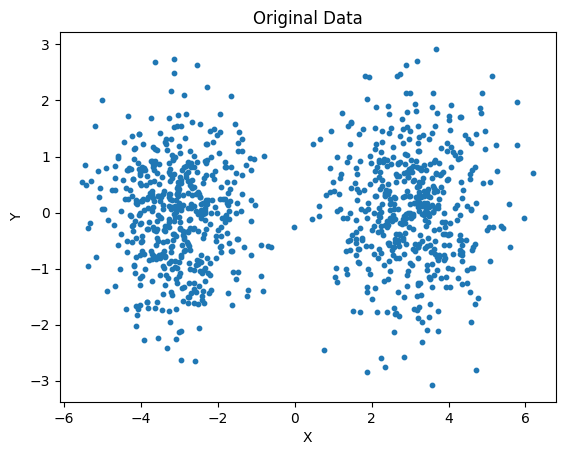

In [6]:
plt.scatter(df[0], df[1], s = 10, marker = "o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Data")

In [22]:
df.shape[0]

1000

In [33]:
def kmeans(data, k, plus=False):
    data_tracker = data.copy()
    data_tracker["Prev Cluster"] = np.nan
    can_reallocate = True
    centroid_history = []
    clusters = {}

    # Initializing the random starting centroids
    centroids = []
    if plus:
        centroids.append(data.iloc[random.sample(range(0, len(df)+1), 1)])
        print("First:", centroids)
        clusters[0] = []

        while len(centroids) < k:
            distances = []
            for p in range(0,len(df)):
                data_point = data.iloc[p].to_numpy()
                closest_centroid_index = -1
                closest_centroid_distance = 10000

                # finding the closest centroid
                for i, c in enumerate(centroids):
                    dist = np.linalg.norm(c - data_point)
                    if dist < closest_centroid_distance:
                        closest_centroid_distance = dist
                        closest_centroid_index = i
                distances.append(closest_centroid_distance**2)
            distances = np.array(distances)
            probabilities = distances / np.sum(distances) #normalizing so distances sum to 1 and can be treated as prob

            new_centroid_index = np.random.choice(data.shape[0], p=probabilities)
            centroids.append(data.iloc[new_centroid_index])
            clusters[len(centroids)-1] = []
            print(centroids)
            print(clusters)
    else:
        centroids_index = random.sample(range(0, len(df)+1), k)
        for j, index in enumerate(centroids_index):
            centroids.append(data.iloc[index])
            clusters[j] = []
    
    while can_reallocate:
        centroid_history.append(centroids)
        is_cluster_different = []
        
        
        # Calculating distance from centroids for each data point
        for p in range(0,len(df)):
            data_point = data.iloc[p].to_numpy()
            closest_centroid_index = -1
            closest_centroid_distance = 10000

            # finding the closest centroid
            for i, c in enumerate(centroids):
                dist = np.linalg.norm(c - data_point)
                if dist < closest_centroid_distance:
                    closest_centroid_distance = dist
                    closest_centroid_index = i
                
            # Allocating points to centroid
            clusters[closest_centroid_index].append(data_point)
            is_cluster_different.append(data_tracker["Prev Cluster"][p] == closest_centroid_index)
            data_tracker.loc[p, "Prev Cluster"] = closest_centroid_index

        can_reallocate = False in is_cluster_different

        # Recalculating centroids
        if can_reallocate:
            for i, c in enumerate(clusters):
                centroids[i] = np.average(clusters[c], axis=0)
                clusters[i] = []
    
    return centroids, centroid_history, clusters


In [17]:
# With help from https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/ 
def plot_clusters(clusters, centroids, k, save=True):
    fig = plt.figure()
    for cluster in clusters.values():
        cluster = pd.DataFrame(cluster)
        fig = plt.scatter(cluster[0], cluster[1], s = 10, marker = "o")
        for centroid in centroids:
            fig = plt.plot(centroid[0], centroid[1], marker = "x", c = "black")
    fig = plt.xlabel("X")
    fig = plt.ylabel("Y")
    fig = plt.title("Data Separated into k=" + str(k) + " Clusters")
    if save:
        fig = plt.savefig(f"Clusters_{k}.png")
        fig = plt.close()

In [9]:
def plot_centroids(centroid_history, k):
    fig = plt.figure()
    for i, step in enumerate(centroid_history):
        if i < len(centroid_history)-1:
            prev_step = centroid_history[i+1]
        for j, point in enumerate(step):
            fig = plt.plot(point[0], point[1], c="black", marker="o", markersize=2)

            if i < len(centroid_history)-1:
                prev_point = prev_step[j]
                fig = plt.arrow(point[0], point[1], prev_point[0]-point[0], prev_point[1]-point[1], length_includes_head=True, color="red",head_width=0.05)
    fig = plt.xlabel("X")
    fig = plt.ylabel("Y")
    fig = plt.title("Movement of Centroids for k=" + str(k) + " Clusters")
    fig = plt.savefig(f"Centroid_History_{k}.png")
    fig = plt.close()

First: [            0         1
914  2.929848 -1.105586]
[            0         1
914  2.929848 -1.105586, 0   -2.674454
1    0.313509
Name: 296, dtype: float64]
{0: [], 1: []}
[            0         1
914  2.929848 -1.105586, 0   -2.674454
1    0.313509
Name: 296, dtype: float64, 0    2.199869
1   -0.655774
Name: 824, dtype: float64]
{0: [], 1: [], 2: []}
[            0         1
914  2.929848 -1.105586, 0   -2.674454
1    0.313509
Name: 296, dtype: float64, 0    2.199869
1   -0.655774
Name: 824, dtype: float64, 0   -5.305605
1    0.564926
Name: 423, dtype: float64]
{0: [], 1: [], 2: [], 3: []}
[            0         1
914  2.929848 -1.105586, 0   -2.674454
1    0.313509
Name: 296, dtype: float64, 0    2.199869
1   -0.655774
Name: 824, dtype: float64, 0   -5.305605
1    0.564926
Name: 423, dtype: float64, 0    2.892047
1    2.641554
Name: 758, dtype: float64]
{0: [], 1: [], 2: [], 3: [], 4: []}
[            0         1
914  2.929848 -1.105586, 0   -2.674454
1    0.313509
Name: 296, dt

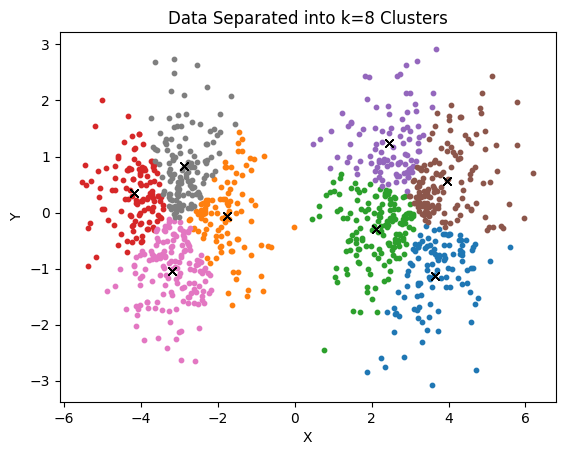

In [37]:
centroids, history, clusters = kmeans(df,8, plus=True)
plot_clusters(clusters, centroids, 8, save=False)

In [160]:
for k in [2,4,8]:
    centroids, history, clusters = kmeans(df,k)
    plot_clusters(clusters, centroids, k)
    plot_centroids(history, k)